# 🚢 Projeto de Previsão de Sobrevivência no Titanic

## Objetivo
O objetivo deste notebook é realizar uma análise completa do famoso dataset do Titanic e construir um modelo de Machine Learning capaz de prever com boa acurácia se um passageiro teria sobrevivido ao desastre.

## Dataset
Os dados utilizados foram obtidos da competição do Kaggle, "Titanic - Machine Learning from Disaster", e estão contidos nos arquivos `train.csv` e `test.csv`. O dataset de treino contém informações demográficas e de viagem para 891 passageiros, indicando se sobreviveram ou não.

## Etapas do Projeto
Neste notebook, as seguintes etapas serão desenvolvidas:
* **Carregamento dos Dados:** Leitura dos arquivos CSV.
* **Análise Exploratória (EDA):** Investigação inicial e visualização dos dados para encontrar padrões e insights.
* **Limpeza e Pré-processamento:** Tratamento de valores faltantes e conversão de variáveis categóricas para numéricas.
* **Engenharia de Features:** Criação de novas variáveis para melhorar a performance do modelo.
* **Treinamento do Modelo:** Escolha, treinamento e avaliação de um modelo de classificação (Random Forest).
* **Exportação do Modelo:** Salvamento do modelo treinado em um arquivo `.pkl` para ser consumido pela aplicação web.

## Ferramentas Utilizadas
* **Linguagem:** Python 3
* **Bibliotecas:** Pandas, NumPy, Matplotlib, Seaborn, e Scikit-learn.

In [19]:
import pandas as pd
df_train = pd.read_csv('../data/train.csv')
df_train.head()
df_train.info()
df_train.describe()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

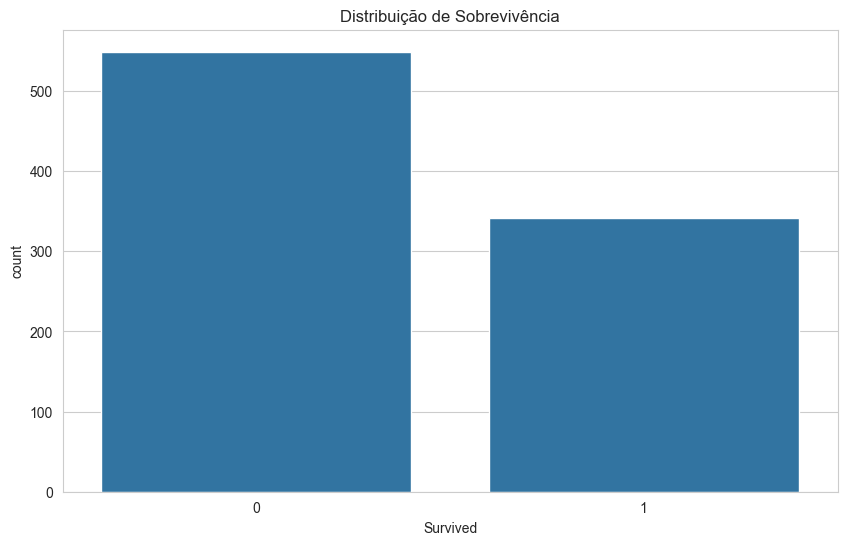

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(x='Survived', data=df_train)
plt.title('Distribuição de Sobrevivência')
plt.show()

### Gráfico de Distribuição de Sobrevivência

**Observação:** O gráfico mostra que houve um número considerável de sobreviventes (valor 1), porém foi menor do que de não sobreviventes (valor 0).

**Insight:** O insight imediato é a confirmação da escala da tragédia: a grande maioria dos passageiros representados neste dataset não sobreviveu.Do ponto de vista de Machine Learning, isso nos mostra que o dataset é desbalanceado. A classe "Não Sobreviveu" é a classe majoritária, e a classe "Sobreviveu" é a minoritária. Essa é uma característica importante a ser observada, pois um modelo treinado com dados desbalanceados pode desenvolver um "vício" (bias) em favor da classe majoritária.

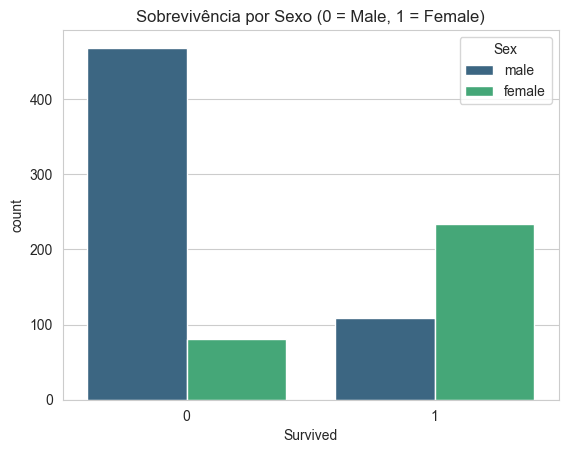

In [21]:
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='viridis')
plt.title('Sobrevivência por Sexo (0 = Male, 1 = Female)')
plt.show()

### Gráfico de Sobrevivência por Sexo

**Observação:** O gráfico mostra que um número muito maior de mulheres sobreviveu em comparação com os homens.

**Insight:** O sexo foi um fator crucial para a sobrevivência, provavelmente devido ao protocolo de evacuação "mulheres e crianças primeiro". A variável `Sex` será um preditor de alto impacto no modelo de Machine Learning.

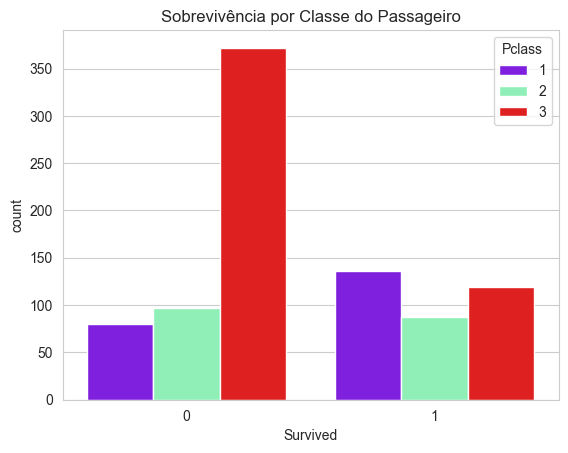

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='rainbow')
plt.title('Sobrevivência por Classe do Passageiro')
plt.show()

### Gráfico de Sobrevivência por Classe do Passageiro

**Observação:** O gráfico mostra que o número de sobreviventes por classe é balanceado entre elas, porém havia um número muito maior de indivíduos da terceira classe a bordo e consequentemente a maioria que não sobreviveu.

**Insight:** O insight fundamental é que a classe social foi um fator crítico e decisivo para a sobrevivência no Titanic. Passageiros da 1ª classe tinham uma probabilidade de sobrevivência significativamente maior, enquanto passageiros da 3ª classe enfrentaram o maior risco de fatalidade. Isso pode ser atribuído a vários fatores, como a localização das cabines (a 1ª classe ficava nos decks superiores, mais perto dos botes salva-vidas) e possivelmente um acesso priorizado durante a evacuação caótica. A diferença não é sutil; é uma das correlações mais fortes em todo o dataset.

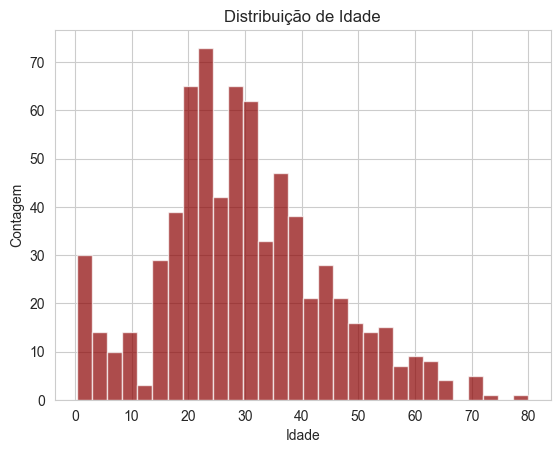

In [23]:
df_train['Age'].hist(bins=30, color='darkred', alpha=0.7)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

### Gráfico de Distribuição por Idade

**Observação:** O histograma mostra que a distribuição de idade dos passageiros não é normal (simétrica); ela é enviesada para a direita (right-skewed). Podemos notar qe o pico da distribuição, ou seja, a faixa etária mais comum, está entre 20 e 30 anos, indicando uma grande população de jovens adultos a bordo, um segundo pico menor na faixa de 0 a 5 anos, o que representa a presença de muitas crianças pequenas e bebês e após os 40 anos, a contagem de passageiros por idade diminui progressivamente, com um número muito pequeno de passageiros idosos.

**Insight:** O perfil demográfico do navio era majoritariamente de jovens adultos em idade produtiva. Isso pode refletir a realidade da época, com muitas pessoas emigrando em busca de trabalho ou novas oportunidades na América. A presença de um grupo significativo de crianças pequenas sugere que havia muitas famílias com filhos a bordo, especialmente na 3ª classe. Além disso, a distribuição assimétrica da idade reforça que a minha decisão de preencher os valores faltantes da coluna "Age" com a mediana foi uma boa escolha, pois a mediana é menos afetada por distribuições enviesadas do que a média.

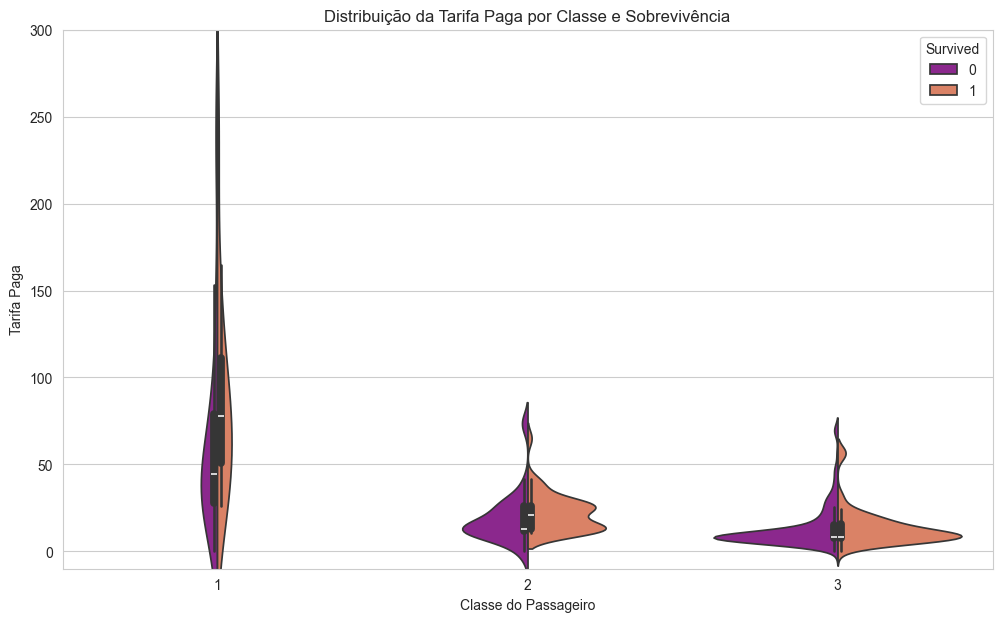

In [24]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df_train, split=True, palette='plasma')
plt.title('Distribuição da Tarifa Paga por Classe e Sobrevivência')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Tarifa Paga')
plt.ylim(-10, 300) 
plt.show()

### Gráfico de Distribuição da Tarifa paga por Classe e Sobrevivência

**Observação:** Este gráfico mostra a distribuição da tarifa "Tarifa Paga" em cada classe "Classe do Passageiro", dividida entre não-sobreviventes (lado roxo, 0) e sobreviventes (lado laranja, 1).

Na 1ª Classe: A variação de tarifas foi enorme, com alguns passageiros pagando valores muito altos (o que estica o "violino" para cima). É nítido que a distribuição para os sobreviventes (lado laranja) é mais "gorda" e se estende para faixas de preço mais altas. A mediana (ponto branco) dos sobreviventes é claramente mais alta que a dos não-sobreviventes.
Na 2ª Classe: A variação de tarifas é bem menor. Mesmo assim, o padrão se repete em menor escala: o lado dos sobreviventes (laranja) é mais largo em tarifas ligeiramente mais altas (entre $20 e $40) do que o lado dos não-sobreviventes (roxo), que se concentra em tarifas mais baixas (entre $10 e $20).
Na 3ª Classe: A grande maioria dos passageiros pagou tarifas muito baixas, o que é representado pela base extremamente larga e achatada do violino. Mesmo neste cenário, o lado laranja dos sobreviventes é um pouco mais espesso em tarifas um pouco mais altas (acima de $10) em comparação com o lado roxo, que está quase inteiramente concentrado nas tarifas mais baratas.

**Insight:** O insight mais poderoso aqui é que a tarifa paga parece ser um fator de sobrevivência mesmo dentro de uma mesma classe social. Isso vai além da simples conclusão de que "passageiros da 1ª classe sobreviveram mais". O gráfico sugere que, mesmo entre dois passageiros da 1ª classe, aquele que pagou uma tarifa mais alta teve uma chance maior de sobrevivência. O mesmo padrão, embora mais sutil, se repete nas outras classes. Logo, isso pode significar que tarifas mais altas, mesmo dentro da mesma classe, correspondiam a cabines mais bem localizadas (mais perto dos decks superiores, das escadarias principais ou dos botes salva-vidas). Portanto, a "Tarifa paga" não é apenas um reflexo da "Pclass", mas uma variável com poder preditivo próprio, capturando um "nível de privilégio" mais granular.

In [25]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Limpeza dos dados
Os dados de 'Age' foram preenchidos com a mediana, pois é uma medida mais robusta a outliers do que a média.

In [26]:
df_train = df_train.drop('Cabin', axis=1)

In [27]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

In [28]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

In [29]:
df_train.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [30]:
x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Modelagem
Escolhi o RandomForest por sua boa performance em problemas de classificação com dados tabulares.

In [33]:
from sklearn.metrics import accuracy_score, classification_report
predictions = model.predict(x_test)
print(f"Acurácia: {accuracy_score(y_test, predictions):.2f}")
print(classification_report(y_test, predictions))

Acurácia: 0.80
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import joblib
joblib.dump(model, '../titanic_survival_model.pkl')

['titanic_survival_model.pkl']

## Conclusão e Próximos Passos

Neste notebook, realizamos o ciclo completo de um projeto de Machine Learning. Partimos de um conjunto de dados brutos do Titanic, realizamos uma análise exploratória para extrair insights valiosos, limpamos e preparamos os dados para a modelagem e, por fim, treinamos um modelo de classificação.

O modelo escolhido, `RandomForestClassifier`, demonstrou uma performance sólida, alcançando uma **acurácia de 80%** no conjunto de teste. O relatório de classificação detalhado confirmou que o modelo é competente em prever tanto os passageiros que sobreviveram quanto os que não sobreviveram, tornando-o confiável para o nosso caso de uso.

Com o modelo avaliado e aprovado, a etapa final foi salvá-lo no arquivo **`titanic_survival_model.pkl`** utilizando a biblioteca `joblib`. Este arquivo contém todo o "conhecimento" que o modelo adquiriu durante o treinamento.

**O próximo passo é utilizar este arquivo `.pkl` na nossa aplicação web Flask.** O back-end da aplicação irá carregar este modelo para fazer previsões em tempo real com base nos dados que os usuários inserirem no site, concluindo assim o nosso projeto ponta a ponta.